In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dfOrders=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/orders.csv')
dfDept=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/departments.csv')
dfOrdersPrior=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/order_products__prior.csv')
dfAisles=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/aisles.csv')
dfProd=pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/Groceries/products.csv')

In [5]:
dfOrdersPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
dfOrders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
dfDept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
dfAisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
dfProd.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
dfShelves = dfProd.merge(dfAisles).sort_values(by='product_name')
dfShelves = dfShelves.merge(dfDept).sort_values(by='product_name')
dfShelves.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,25773,#2 Coffee Filters,26,7,coffee,beverages
1,2158,#2 Cone White Coffee Filters,26,7,coffee,beverages
4365,26685,#2 Mechanical Pencils,87,17,more household,household
2,26381,#4 Natural Brown Coffee Filters,26,7,coffee,beverages
7450,20604,& Go! Hazelnut Spread + Pretzel Sticks,88,13,spreads,pantry


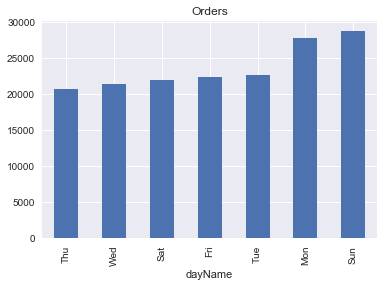

In [11]:
days = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'} #dictionary of numeric day:Alpha day
a = dfOrders #set new df equal to orders df
a['dayName']=a['order_dow'].apply(lambda x: days[x]) #create new column 'dayName' compare' order_dow' to dictionary
a = a[a.user_id <= 10000] #sample the first 1000 rows to limit calc time
a = a.groupby('dayName').size().sort_values() #group the orders by dayName
a.plot(kind='bar',title='Orders') #plot as bar plot
#how do i rearrange these in sequence of days?

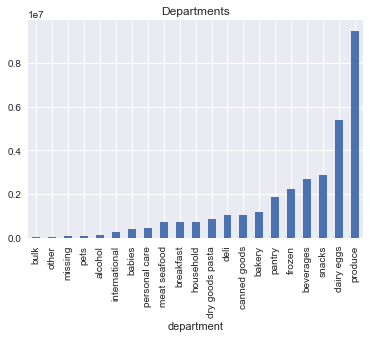

In [12]:
dfFun = dfOrdersPrior.merge(dfShelves) #combine the prior orders & shelf contents
a=dfFun.groupby(['department']).size().sort_values() #groupby department
a.plot(kind='bar',title='Departments')
#determine how to plot the biggest 25 departments on a bar chart

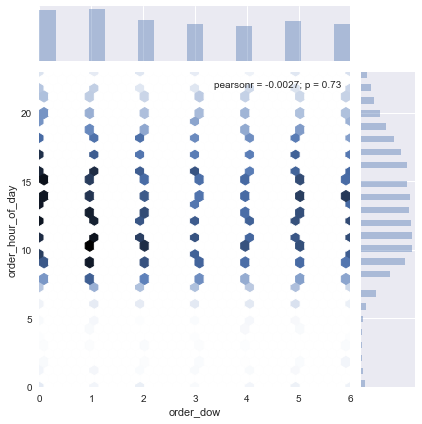

In [13]:
b = dfOrders
b = b[b.user_id <=1000]
#b = b.groupby(['order_dow','order_hour_of_day'])
sns.jointplot(x='order_dow',y='order_hour_of_day',data=b,kind='hex')


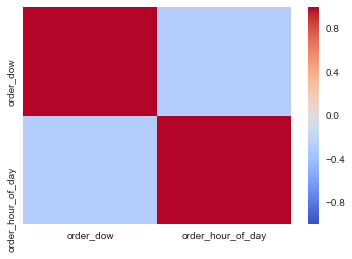

In [14]:
c = dfOrders[dfOrders.user_id <=10]
c=c[['order_dow','order_hour_of_day']]
c.set_index('order_dow')
sns.heatmap(c.corr(),cmap='coolwarm')

In [15]:
#d= dfOrders.fillna(0)
#d.head()
#sns.heatmap(d,cmap='coolwarm')
#what does this error mean?

In [19]:
e=dfOrders[dfOrders.user_id<=1000]
e=dfOrders[['order_dow','order_hour_of_day','days_since_prior_order']]
e.fillna(value=e['days_since_prior_order'].mean())
e.set_index(['order_dow','order_hour_of_day','days_since_prior_order'],append=True)
e.pivot(index='order_dow',columns='order_hour_of_day',values='days_since_prior_order')
#sns.heatmap(e,cmap='coolwarm')
#why can't i make a pivot table on this data?

ValueError: Index contains duplicate entries, cannot reshape